Premise : We use probabilistic numerics to solve an ode system and fit data. From this process, we obtain $\beta(t)$ and the states. We want to make sure that the same solution can be recovered when using a typical ode solver.

In [16]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import scipy

## Get information from fitting process

In [8]:
def plot_sir(data, posterior, skip_first=0):
    fig, axs = plt.subplots(1,3,figsize=(16,4))

    for i, label in enumerate(["Susceptible", "Infected", "Recovered"]):
        axs[i].plot(np.exp(posterior["means"][:, (info["x_process_ordint"] + 1)*i])[::(1+int(1/info["filter_step_size"]))][skip_first:], label="Prediction")
        if i==0 : axs[i].plot(data["sir_data"][skip_first:, i], 'x', label="Data", alpha=0.2)
        axs[i].set_title(label)
        axs[i].legend()
    return

def plot_data(data):
    plt.figure(figsize=(16,4))
    plt.plot(data["sir_data"][:, 0:1], '.', label="Measurement data")
    plt.legend()
    return

def beta_link_fn(x, info, data, y_offset=0.0):
    slope = info["sigmoid_slope"]
    x_offset = -scipy.special.logit(data["beta_prior_mean"])
    return scipy.special.expit(slope * (x - x_offset)) + y_offset

def plot_beta(arr, info, data):
    fig, axs = plt.subplots(1, figsize=(16,4))
    axs.plot(beta_link_fn(arr["means"][:,-2][::1+int(1/info["filter_step_size"])], info, data))
    

In [20]:
dir_list = [el for el in os.listdir() if el.startswith("run_ger")]
dir_list.sort(key=lambda x: os.path.getmtime(x))
run = dir_list[0]
print(dir_list)
print("plotting run : {}".format(run))

['run_ger_2023-02-11_13-27-38', 'run_ger_2023-02-11_13-30-33', 'run_ger_2023-02-11_13-33-56', 'run_ger_2023-02-11_13-35-35', 'run_ger_2023-02-11_13-37-44', 'run_ger_2023-02-11_13-39-22']
plotting run : run_ger_2023-02-11_13-27-38


In [21]:
arr = np.load(run + "/posterior_first.npz")
data = np.load(run + "/data_info.npz")

with open(run + "/info.json") as f:
    info = json.load(f)

In [22]:
data["gamma"]

array(0.06)

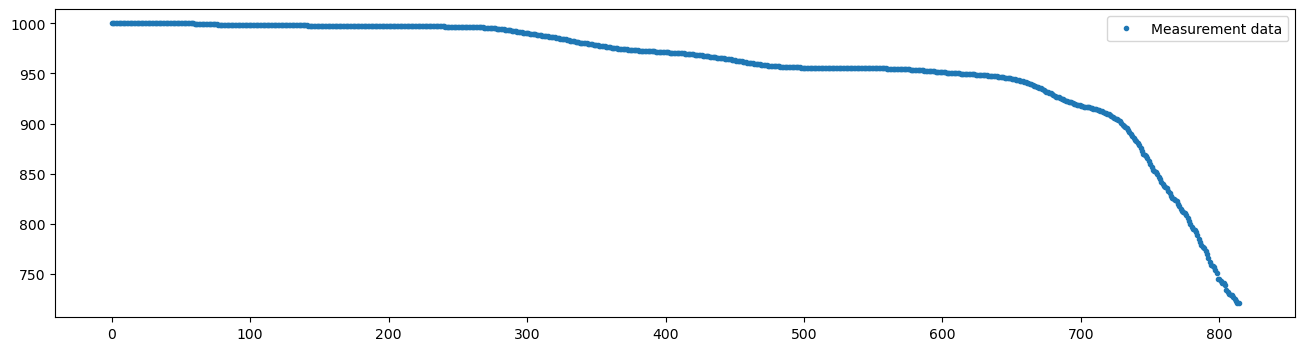

In [23]:
plot_data(data)

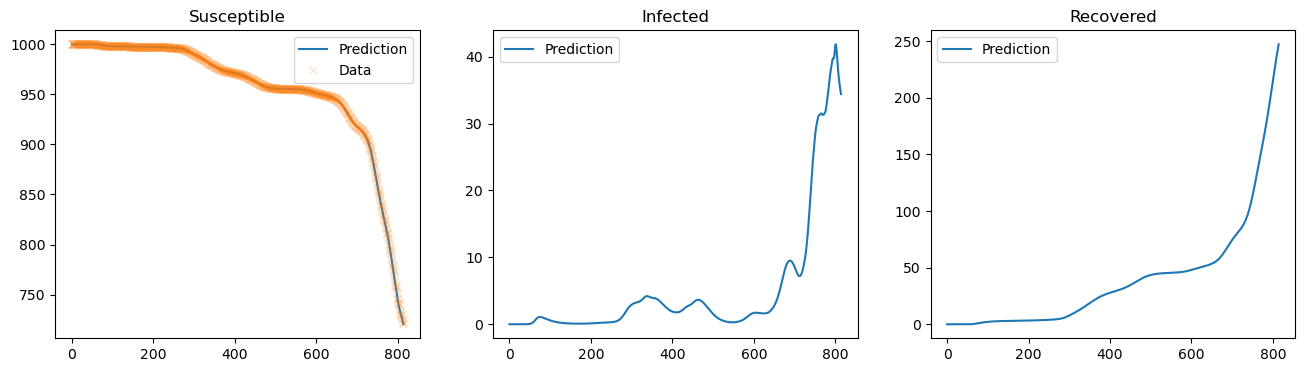

In [24]:
plot_sir(data, arr)

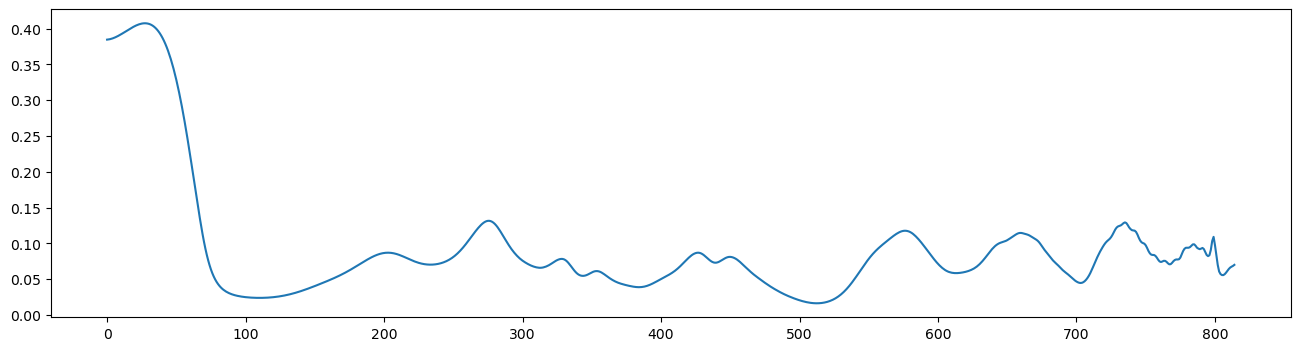

In [25]:
plot_beta(arr, info, data)

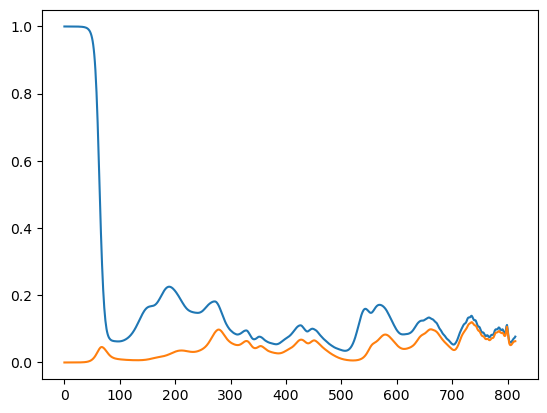

In [137]:
plt.plot(beta_link_fn(arr["means"][::25, -2] + 2*np.sqrt(arr["covs"][::25, -2, -2]), info, data))
plt.plot(beta_link_fn(arr["means"][::25, -2] - 2*np.sqrt(arr["covs"][::25, -2, -2]), info, data))

## We try to recover the SIR states with an ODE solver, using $\beta(t)$ and $\gamma$

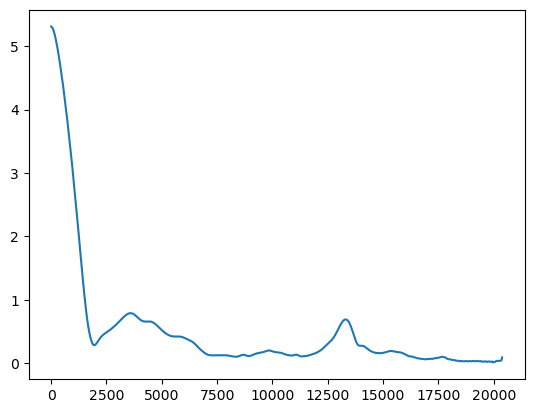

In [136]:
plt.plot(np.sqrt(arr["covs"][:,-2, -2]))

In [91]:
betas = beta_link_fn(arr["means"][:,-2], info, data)
gamma = data["gamma"]
N = 1000

In [114]:
tspan = np.arange(len(betas))

In [120]:
y0 = np.exp(arr["means"][0,[0,3, 6]])
yt = np.zeros((len(betas)+1, 3)) + y0

In [123]:
dt = 1/24
for t in tspan:
    yt[t+1,:] = yt[t,:] + dt * f(t, yt[t,:])

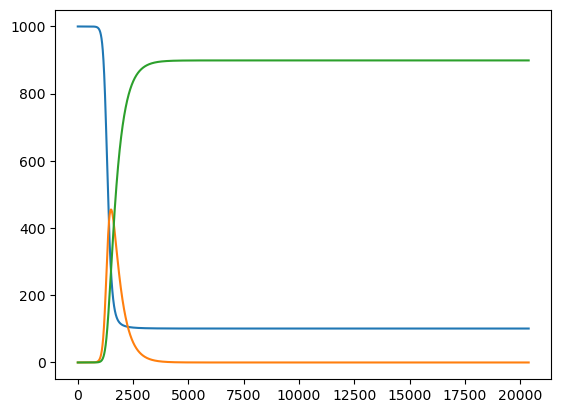

In [130]:
plt.plot(yt[:,0])
plt.plot(yt[:, 1])
plt.plot(yt[:, 2])

In [89]:
def f(t, y):
    S, I, R = y
    
    dS = -betas[int(t)] * S * I / N
    dI = betas[int(t)] * S * I / N - gamma * I
    dR = gamma * I
    return np.array([dS, dI, dR])

def df(t, y):
    S, I, R = y
    
    r1 = np.array([-beta(t) * I / N, -beta(t) * S / N, 0])
    r2 = np.array([beta(t) * I / N, beta(t) * S / N - gamma, 0])
    r3 = np.array([0, gamma, 0])
    
    return np.stack([r1, r2, r3])

In [ ]:
for i in range(0, )

In [ ]:
delta_t = 1/24

# Define parameters
f = lambda t, s: np.exp(-t) # ODE
h = 0.1 # Step size
t = np.arange(0, 1 + h, h) # Numerical grid
s0 = -1 # Initial Condition

# Explicit Euler Method
s = np.zeros(len(t))
s[0] = s0

for i in range(0, len(t) - 1):
    s[i + 1] = s[i] + h*f(t[i], s[i])